In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk import FreqDist, bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Load your dataset
df = pd.read_csv('/content/Twitter_Data.csv')

# Preview the dataset
print(df.head())

df = df.iloc[:60000,:]


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [31]:
def preprocess_tweet(tweet):
    tweet = str(tweet)
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Make words lowercase
    tweet = tweet.lower()
    # Tokenize the tweet
    tweet_tokens = word_tokenize(tweet)
    # Remove stopwords
    filtered_words = [w for w in tweet_tokens if not w in stopwords.words('english')]

    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]

    return " ".join(stemmed_words)

# Apply the preprocessing function to your dataset
df['processed_tweet'] = df['clean_text'].apply(preprocess_tweet)


In [32]:
print(df['processed_tweet'].head())


0    modi promis minimum govern maximum govern expe...
1                 talk nonsens continu drama vote modi
2    say vote modi welcom bjp told rahul main campa...
3    ask support prefix chowkidar name modi great s...
4    answer among power world leader today trump pu...
Name: processed_tweet, dtype: object


In [33]:
print(df.head())
print(df.info())
print(df.isnull().sum())


                                          clean_text  category  \
0  when modi promised “minimum government maximum...      -1.0   
1  talk all the nonsense and continue all the dra...       0.0   
2  what did just say vote for modi  welcome bjp t...       1.0   
3  asking his supporters prefix chowkidar their n...       1.0   
4  answer who among these the most powerful world...       1.0   

                                     processed_tweet  
0  modi promis minimum govern maximum govern expe...  
1               talk nonsens continu drama vote modi  
2  say vote modi welcom bjp told rahul main campa...  
3  ask support prefix chowkidar name modi great s...  
4  answer among power world leader today trump pu...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clean_text       59999 non-null  object 
 1   category         60000

In [34]:
df = df.dropna(subset=['clean_text'])


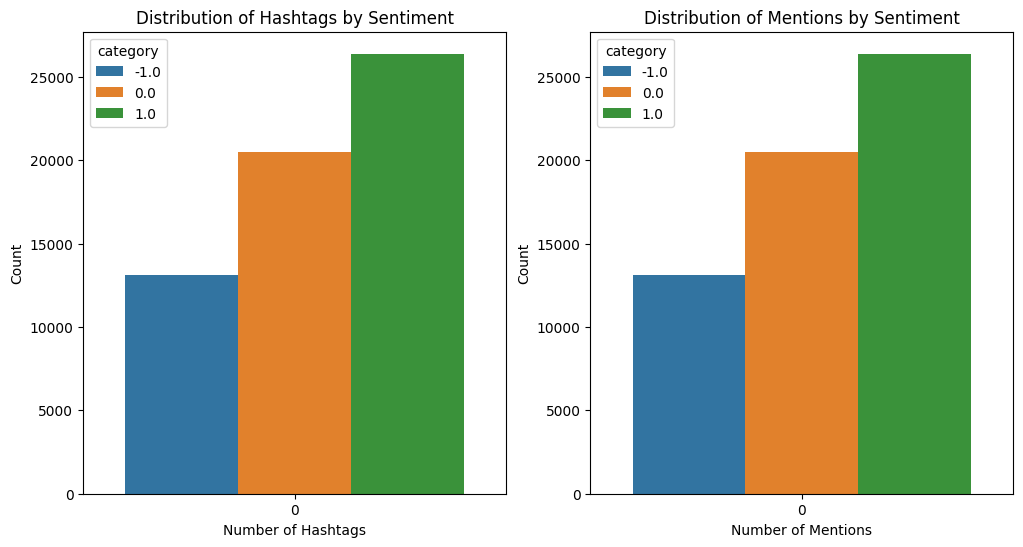

In [35]:
# Extract hashtags and mentions
hashtags = df['processed_tweet'].apply(lambda x: [word for word in x.split() if word.startswith('#')])
mentions = df['processed_tweet'].apply(lambda x: [word for word in x.split() if word.startswith('@')])

# Plot the distribution of the number of hashtags and mentions by sentiment
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=hashtags.apply(len), hue=df['category'])
plt.title('Distribution of Hashtags by Sentiment')
plt.xlabel('Number of Hashtags')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=mentions.apply(len), hue=df['category'])
plt.title('Distribution of Mentions by Sentiment')
plt.xlabel('Number of Mentions')
plt.ylabel('Count')

plt.show()


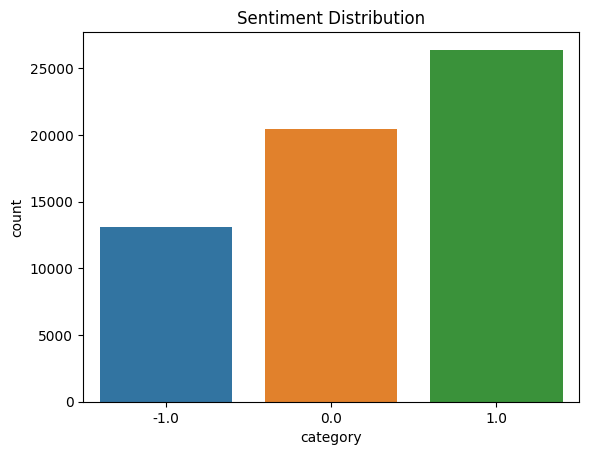

In [36]:
sns.countplot(x='category', data=df)
plt.title('Sentiment Distribution')
plt.show()


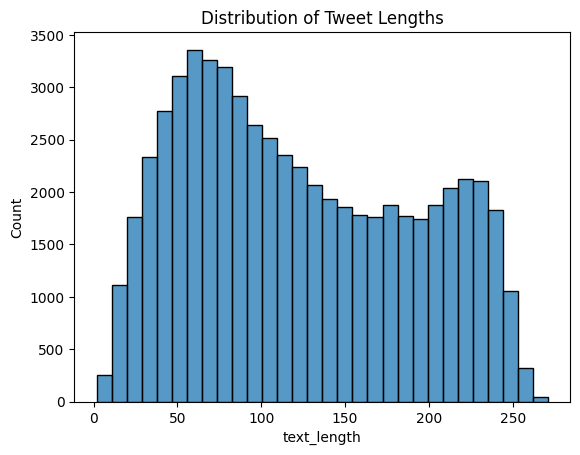

In [37]:
df['text_length'] = df['clean_text'].str.len()
sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.show()


In [38]:
from nltk.tokenize import word_tokenize

all_words = ' '.join(df['processed_tweet']).split()
freq_dist = nltk.FreqDist(all_words)
print(freq_dist.most_common(20))


[('modi', 59487), ('india', 12207), ('bjp', 5534), ('peopl', 5055), ('like', 4920), ('vote', 4688), ('congress', 4503), ('elect', 4501), ('narendra', 4403), ('nation', 4354), ('say', 3937), ('govt', 3861), ('indian', 3677), ('one', 3486), ('give', 3424), ('year', 3395), ('countri', 3183), ('time', 3148), ('rahul', 3025), ('dont', 2942)]


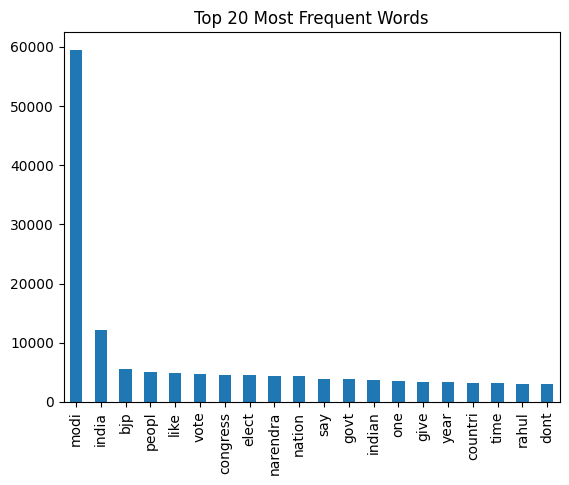

In [39]:
pd.Series(freq_dist).sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Words')
plt.show()


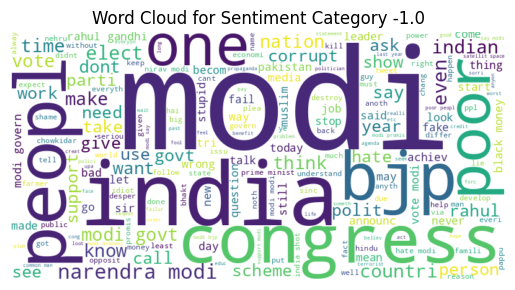

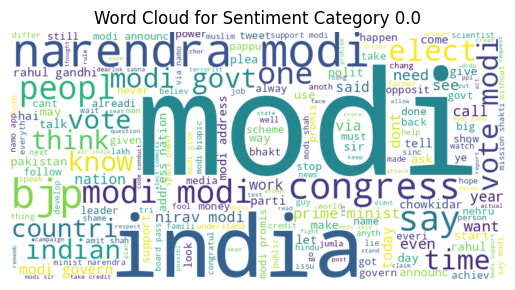

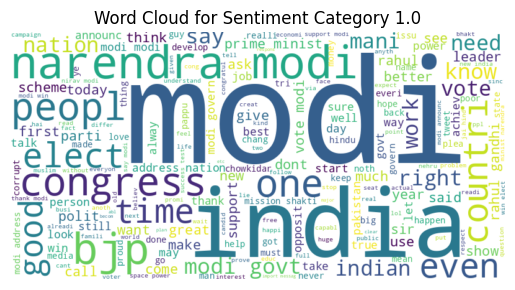

In [40]:
for category in df['category'].unique():
    category_words = ' '.join(df[df['category'] == category]['processed_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment Category {category}')
    plt.show()


### Implement models

In [41]:
#drop the clean_text as text was cleaned and processed into processed_tweet

df.drop(['clean_text'],axis=1,inplace=True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


#split the data into train and test
X = df['processed_tweet'].values
y = df['category'].values
X_train,X_test,train_labels,test_labels = train_test_split(X, y, test_size = 0.2,random_state=42)

Training Naive Bayes...
Accuracy for Naive Bayes: 0.56

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

        -1.0       0.90      0.10      0.18      2596
         0.0       0.84      0.32      0.47      4135
         1.0       0.51      0.97      0.67      5269

    accuracy                           0.56     12000
   macro avg       0.75      0.47      0.44     12000
weighted avg       0.71      0.56      0.49     12000


Confusion Matrix for Naive Bayes:


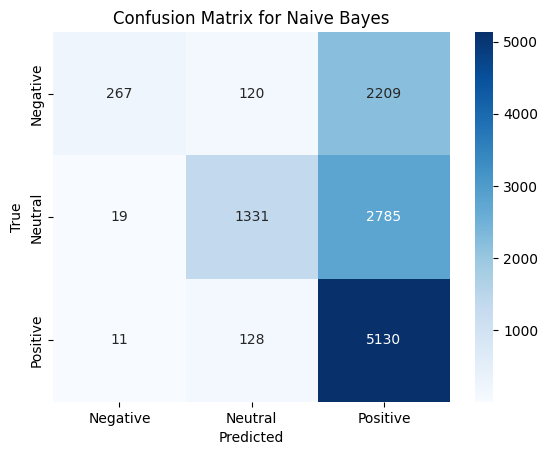

Training Logistic Regression...
Accuracy for Logistic Regression: 0.83

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        -1.0       0.82      0.68      0.74      2596
         0.0       0.80      0.89      0.84      4135
         1.0       0.86      0.85      0.85      5269

    accuracy                           0.83     12000
   macro avg       0.82      0.81      0.81     12000
weighted avg       0.83      0.83      0.83     12000


Confusion Matrix for Logistic Regression:


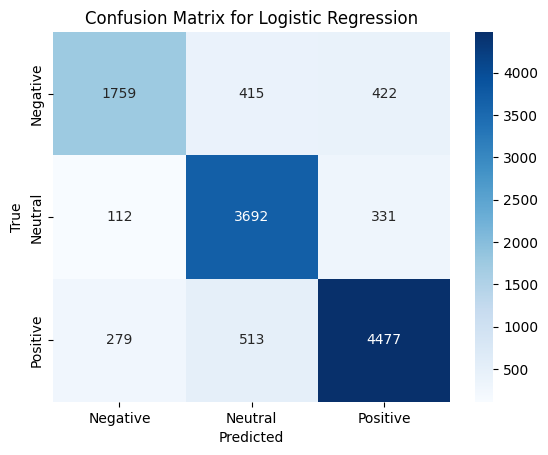

Training SVM...
Accuracy for SVM: 0.83

Classification Report for SVM:
              precision    recall  f1-score   support

        -1.0       0.83      0.67      0.74      2596
         0.0       0.80      0.92      0.85      4135
         1.0       0.87      0.85      0.86      5269

    accuracy                           0.83     12000
   macro avg       0.83      0.81      0.82     12000
weighted avg       0.84      0.83      0.83     12000


Confusion Matrix for SVM:


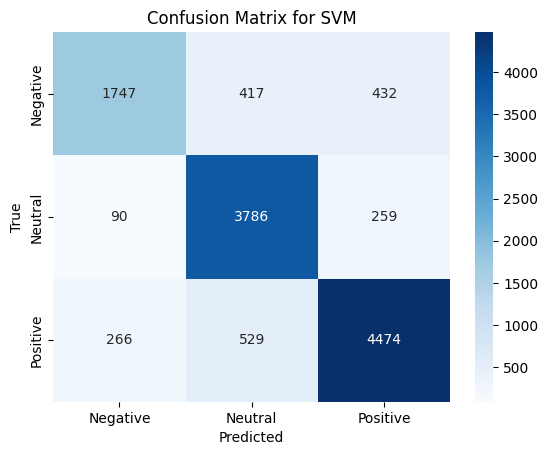

Training Decision Tree...
Accuracy for Decision Tree: 0.75

Classification Report for Decision Tree:
              precision    recall  f1-score   support

        -1.0       0.65      0.60      0.62      2596
         0.0       0.77      0.82      0.79      4135
         1.0       0.79      0.78      0.79      5269

    accuracy                           0.75     12000
   macro avg       0.74      0.73      0.73     12000
weighted avg       0.75      0.75      0.75     12000


Confusion Matrix for Decision Tree:


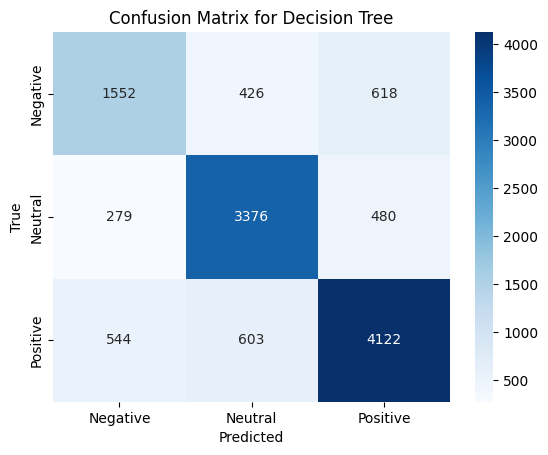

Training Random Forest...
Accuracy for Random Forest: 0.79

Classification Report for Random Forest:
              precision    recall  f1-score   support

        -1.0       0.86      0.51      0.64      2596
         0.0       0.79      0.87      0.83      4135
         1.0       0.78      0.87      0.82      5269

    accuracy                           0.79     12000
   macro avg       0.81      0.75      0.76     12000
weighted avg       0.80      0.79      0.79     12000


Confusion Matrix for Random Forest:


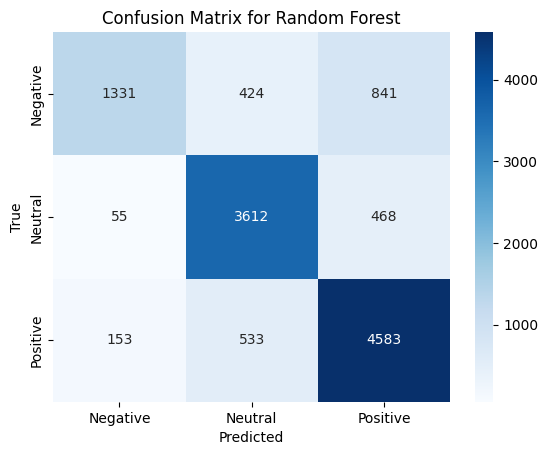

In [43]:
# Define a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Create pipelines for each classifier
pipelines = {}

for name, classifier in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('classifier', classifier)
    ])

# Train and evaluate each classifier using the pipeline
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train,train_labels)

    # Make predictions on the test set
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(test_labels, predictions)
    print(f'Accuracy for {name}: {accuracy:.2f}')

    # Display classification report and confusion matrix
    print(f'\nClassification Report for {name}:')
    print(classification_report(test_labels, predictions))

    print(f'\nConfusion Matrix for {name}:')
    conf_matrix = confusion_matrix(test_labels, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


  ### Implement the LSTM Model

In [58]:
from sklearn.preprocessing import LabelEncoder
X = df['processed_tweet']
y = df['category']

#convert labels into postive integers which can be useful while getting max class from predicted probabilities
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=df['text_length'].max())  # maxlen chosen from df


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [61]:
vocab_size = len(tokenizer.word_index) + 1  # Plus 1 for padding
max_length = df['text_length'].max()  # Or the maxlen used in pad_sequences

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))  # 100 is the embedding dimension
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [62]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape,y_train.shape

((47999, 271), (47999,))

In [64]:
import numpy as np
np.unique(y_train)

array([0, 1, 2])

In [65]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)``
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping],batch_size = 64)


Epoch 1/5
750/750 [==============================] - 683s 907ms/step - loss: 0.5804 - accuracy: 0.7668 - val_loss: 0.4347 - val_accuracy: 0.8496
Epoch 2/5
750/750 [==============================] - 674s 899ms/step - loss: 0.3853 - accuracy: 0.8656 - val_loss: 0.4186 - val_accuracy: 0.8552
Epoch 3/5
750/750 [==============================] - 675s 900ms/step - loss: 0.3547 - accuracy: 0.8758 - val_loss: 0.4251 - val_accuracy: 0.8550
Epoch 4/5
750/750 [==============================] - 677s 903ms/step - loss: 0.3288 - accuracy: 0.8841 - val_loss: 0.4368 - val_accuracy: 0.8524
Epoch 5/5
750/750 [==============================] - 682s 909ms/step - loss: 0.2965 - accuracy: 0.8945 - val_loss: 0.4393 - val_accuracy: 0.8510


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [66]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)  # Convert probabilities to class labels
print(classification_report(y_test, y_pred_classes))



375/375 [==============================] - 32s 86ms/step
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2596
           1       0.86      0.88      0.87      4135
           2       0.87      0.86      0.87      5269

    accuracy                           0.85     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.85      0.85      0.85     12000



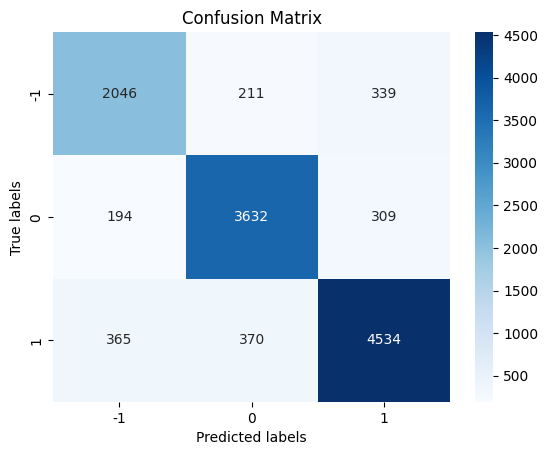

In [67]:

# inverse transform the test and pred labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Create a confusion matrix with the original labels
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Set up a custom axis ticks and labels
class_labels = [-1, 0, 1]
tick_labels = [str(label) for label in class_labels]

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=tick_labels, yticklabels=tick_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [68]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.2 MB/s eta 0:00:00


In [70]:
from kerastuner.tuners import RandomSearch
import tensorflow as tf

def build_model(hp):
    model = Sequential()
    model.add(Embedding(vocab_size, hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
                        input_length=max_length))
    model.add(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32), dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=2, executions_per_trial=3, directory='my_dir', project_name='hparam_tuning')

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
32                |32                |embedding_dim
64                |64                |lstm_units
0.01              |0.01              |learning_rate



Epoch 1/5
1500/1500 [==============================] - 1363s 903ms/step - loss: 0.5175 - accuracy: 0.8046 - val_loss: 0.4209 - val_accuracy: 0.8516
Epoch 2/5
1500/1500 [==============================] - 1349s 900ms/step - loss: 0.3977 - accuracy: 0.8574 - val_loss: 0.4192 - val_accuracy: 0.8486
Epoch 3/5
1500/1500 [==============================] - 1333s 888ms/step - loss: 0.3559 - accuracy: 0.8705 - val_loss: 0.4468 - val_accuracy: 0.8491
Epoch 4/5
1500/1500 [==============================] - 1349s 899ms/step - loss: 0.3328 - accuracy: 0.8800 - val_loss: 0.4626 - val_accuracy: 0.8419
Epoch 5/5
1500/1500 [==============================] - 1332s 888ms/step - loss: 0.3171 - accuracy: 0.8846 - val_loss: 0.4709 - val_accuracy: 0.8422


Epoch 1/5
 394/1500 [======>.......................] - ETA: 16:24 - loss: 0.6666 - accuracy: 0.7261

KeyboardInterrupt: ignored

In [75]:
# Function to predict sentiment
def predict_sentiment(statement):
    sequence = tokenizer.texts_to_sequences([statement])
    padded_sequence = pad_sequences(sequence, maxlen=200)  # Adjust 'maxlen' as per your training setup
    prediction = model.predict(padded_sequence)

    # Assuming your classes are encoded as 0, 1, 2
    class_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    predicted_class = int(prediction.argmax(axis=1))

    sentiment = class_mapping.get(predicted_class, 'Unknown')
    return sentiment


In [76]:
# Example usage
statement = "People hate government"
sentiment = predict_sentiment(statement)
print("Predicted Sentiment:", sentiment)


1/1 [==============================] - 0s 75ms/step
Predicted Sentiment: Negative


In [77]:
# Example usage
statement = "People love government"
sentiment = predict_sentiment(statement)
print("Predicted Sentiment:", sentiment)


1/1 [==============================] - 0s 124ms/step
Predicted Sentiment: Positive
